In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country = "US"

In [3]:
#Total COVID confirmed cases
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_confirmed.head(1000000)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,183268,183272,183285,183358,183407,183445,183572,183687,183908,184038
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,288176,289391,290954,290954,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266274,266303,266328,266356,266392,266424,266445,266487,266542,266591
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,45061,45061,45061
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101600,101901,101901,101901,102209,102209,102209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,662490,662588,662588,662588,662588,662588,662588,669542,672039,672039
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11832,11832,11832,11832,11832,11848,11848,11848,11849,11849
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,327102,327102,327102,327102,327994,327994,327994,327994,328550,328550


In [4]:
#df_confirmed.to_csv('global.csv')
df_confirmed_country = df_confirmed[df_confirmed["Country/Region"] == country]
df_confirmed_country.head(500000)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22
257,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,88805899,88953093,89156425,89300864,89459449,89529073,89547884,89677127,89830640,90046834


In [5]:
df_confirmed_country = pd.DataFrame(df_confirmed_country[df_confirmed_country.columns[4:]].sum(),columns=["confirmed"])
df_confirmed_country.head(100000)

,confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
7/16/22,89529073
7/17/22,89547884
7/18/22,89677127
7/19/22,89830640


In [6]:
df_confirmed_country.index = pd.to_datetime(df_confirmed_country.index,format='%m/%d/%y')
df_confirmed_country.head(10000)

,confirmed
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2022-07-16,89529073
2022-07-17,89547884
2022-07-18,89677127
2022-07-19,89830640


<AxesSubplot:title={'center':'COVID confirmed cases'}>

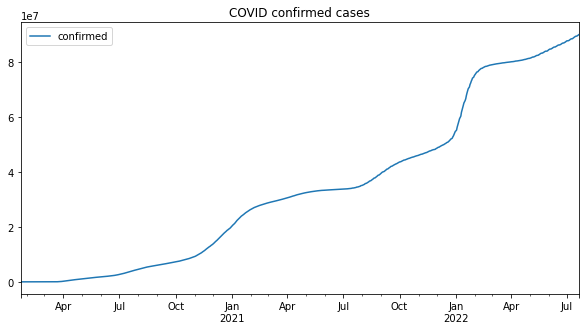

In [7]:
df_confirmed_country.plot(figsize=(10,5),title="COVID confirmed cases")

In [8]:
print("Total days in the dataset", len(df_confirmed_country))


Total days in the dataset 911


In [9]:
#Use data until 14 days before as training
x = len(df_confirmed_country)-14

In [10]:
train=df_confirmed_country.iloc[:x]
test = df_confirmed_country.iloc[x:]

In [11]:
print(train,test)

            confirmed
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
...               ...
2022-07-02   87852544
2022-07-03   87859471
2022-07-04   87939364
2022-07-05   88077765
2022-07-06   88277044

[897 rows x 1 columns]             confirmed
2022-07-07   88417893
2022-07-08   88554890
2022-07-09   88581737
2022-07-10   88604240
2022-07-11   88805899
2022-07-12   88953093
2022-07-13   89156425
2022-07-14   89300864
2022-07-15   89459449
2022-07-16   89529073
2022-07-17   89547884
2022-07-18   89677127
2022-07-19   89830640
2022-07-20   90046834


In [12]:
##scale or normalize data as the data is too skewed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
print(train_scaled)
test_scaled = scaler.transform(test)
print(test_scaled)

[[0.00000000e+00]
 [0.00000000e+00]
 [1.13279735e-08]
 [1.13279735e-08]
 [4.53118938e-08]
 [4.53118938e-08]
 [4.53118938e-08]
 [5.66398673e-08]
 [5.66398673e-08]
 [7.92958142e-08]
 [7.92958142e-08]
 [7.92958142e-08]
 [1.13279735e-07]
 [1.13279735e-07]
 [1.13279735e-07]
 [1.24607708e-07]
 [1.24607708e-07]
 [1.24607708e-07]
 [1.24607708e-07]
 [1.24607708e-07]
 [1.35935681e-07]
 [1.35935681e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.47263655e-07]
 [1.69919602e-07]
 [1.69919602e-07]
 [1.69919602e-07]
 [1.69919602e-07]
 [1.69919602e-07]
 [1.69919602e-07]
 [1.81247575e-07]
 [1.81247575e-07]
 [2.71871363e-07]
 [3.51167177e-07]
 [6.11710567e-07]
 [8.26942062e-07]
 [1.20076519e-06]
 [2.07301914e-06]
 [2.67340174e-06]
 [4.55384533e-06]
 [5.86789025e-06]
 [6.71748826e-06]
 [8.84714727e-06]
 [1.29818576e-05]
 [1.79548379e-05]
 [2.51254451e-05]
 [3.37233770e-05]
 [3.63741228e-05]
 [5.29922598e-05]
 [7.375643

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
seq_size = 7  ## number of steps (lookback)
n_features = 1 ## number of features. This dataset is univariate so it is 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train)) # 271
print("Total number of samples in the generated data = ", len(train_generator)) # 264 with seq_size=7

Total number of samples in the original training data =  897
Total number of samples in the generated data =  890


In [15]:
#Check data shape from generator
x,y = train_generator[10]  #Check train_generator
print(x, y)
#Takes 7 days as x and 8th day as y (for seq_size=7)

[[[7.92958142e-08]
  [7.92958142e-08]
  [1.13279735e-07]
  [1.13279735e-07]
  [1.13279735e-07]
  [1.24607708e-07]
  [1.24607708e-07]]] [[1.24607708e-07]]


In [16]:
#Also generate test data
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7
#Check data shape from generator
x,y = test_generator[0]

Total number of samples in the original training data =  14
Total number of samples in the generated data =  7


In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

#Define Model 
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 150)            91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=50, steps_per_epoch=10)

C:\Users\PC1\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 4s 72ms/step - loss: 0.1199 - val_loss: 0.3259
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0339 - val_loss: 0.0121
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0275 - val_loss: 0.1097
Epoch 4/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0281 - val_loss: 0.0289
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0031 - val_loss: 0.0056
Epoch 8/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 0.0182
Epoch 9/50
10/10 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.01110031   
Epoch 10/50
10/10 [==============================] - 0s 12ms/step - loss: 8.7652e-04 - val_loss: 1.517

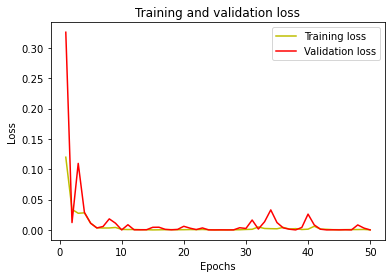

In [19]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [21]:
## Predict future, beyond test dates
future = 7 #Days
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [22]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Get dates for test data

In [23]:
#Add new dates for the forecast period
for k in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [24]:
#Create a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_confirmed","predicted"], index=time_series_array)
df_forecast.head(1000)

,actual_confirmed,predicted
2022-07-07,NaN,NaN
2022-07-08,NaN,NaN
2022-07-09,NaN,NaN
2022-07-10,NaN,NaN
2022-07-11,NaN,NaN
2022-07-12,NaN,NaN
2022-07-13,NaN,NaN
2022-07-14,NaN,NaN
2022-07-15,NaN,NaN
2022-07-16,NaN,NaN


In [25]:
df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_confirmed"] = test["confirmed"]
df_forecast.head(10000)


,actual_confirmed,predicted
2022-07-07,88417893.0,8.819118e+07
2022-07-08,88554890.0,8.827228e+07
2022-07-09,88581737.0,8.833743e+07
2022-07-10,88604240.0,8.841021e+07
2022-07-11,88805899.0,8.849424e+07
2022-07-12,88953093.0,8.857627e+07
2022-07-13,89156425.0,8.864609e+07
2022-07-14,89300864.0,8.869454e+07
2022-07-15,89459449.0,8.876974e+07
2022-07-16,89529073.0,8.884288e+07


<AxesSubplot:>

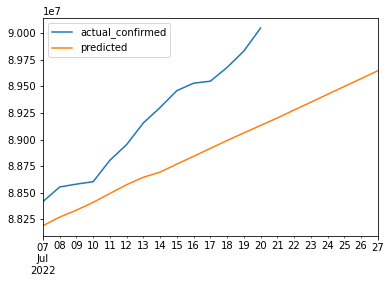

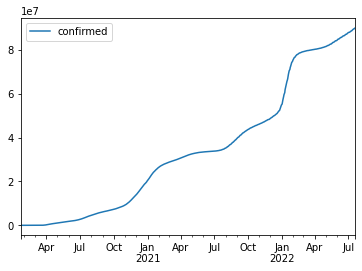

In [26]:
#Plot
df_forecast.plot()
df_confirmed_country.plot()